# Aditya Patel Final Project

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Dataset
The dataset we have contains prices of 2 raw materials over approximately the last 10 years. The raw materials are Refined Bleached Deodorized Palm Stearin (RBDPS) and Palm Fatty Acid Distillate (PFAD).

### Some information on the materials:

Palm stearin (RBDPS) is most frequently mixed with vegetable oil and used in the manufacture food products and animal feed.

Palm Fatty Acid Distillate (PFAD) is a byproduct of refining the palm stearin, and is mostly used in manufacture of candles, soaps, and some biofuels.


In [24]:
df = pd.read_csv("dataset.csv")
df = df.drop(columns = ["Unnamed: 0"])
df

,Date,RBDPS,PFAD,USD
0,2010-06-01,775.0,652.5,47.24
1,2010-06-02,780.0,650.0,47.03
2,2010-06-03,780.0,650.0,47.03
3,2010-06-04,785.0,652.5,46.86
4,2010-06-05,785.0,652.5,46.86
...,...,...,...,...
3621,2021-05-25,1160.0,1060.0,72.81
3622,2021-05-27,1153.0,1043.0,72.72
3623,2021-06-01,1115.0,1013.0,72.85
3624,2021-06-03,1152.0,1043.0,73.04


## We will now perform some cleanup on our data:

We will drop null values from dataframe

We will set the index to our dates column, and convert the type of the column to datetime objects so that we can use them for further analysis

In [25]:
df = df.dropna()

In [26]:
df1 = df.set_index("Date")


In [27]:
df1.index = pd.to_datetime(df1.index)
df1

,RBDPS,PFAD,USD
Date,,,
2010-06-01,775.0,652.5,47.24
2010-06-02,780.0,650.0,47.03
2010-06-03,780.0,650.0,47.03
2010-06-04,785.0,652.5,46.86
2010-06-05,785.0,652.5,46.86
...,...,...,...
2021-05-25,1160.0,1060.0,72.81
2021-05-27,1153.0,1043.0,72.72
2021-06-01,1115.0,1013.0,72.85


 Let us plot the graphs to look at the relationship between the two materials and over time

Since the data is so huge, we can size down the data to weekly instead of daily, only for the purpose of smoothening the graphs and making them more readable

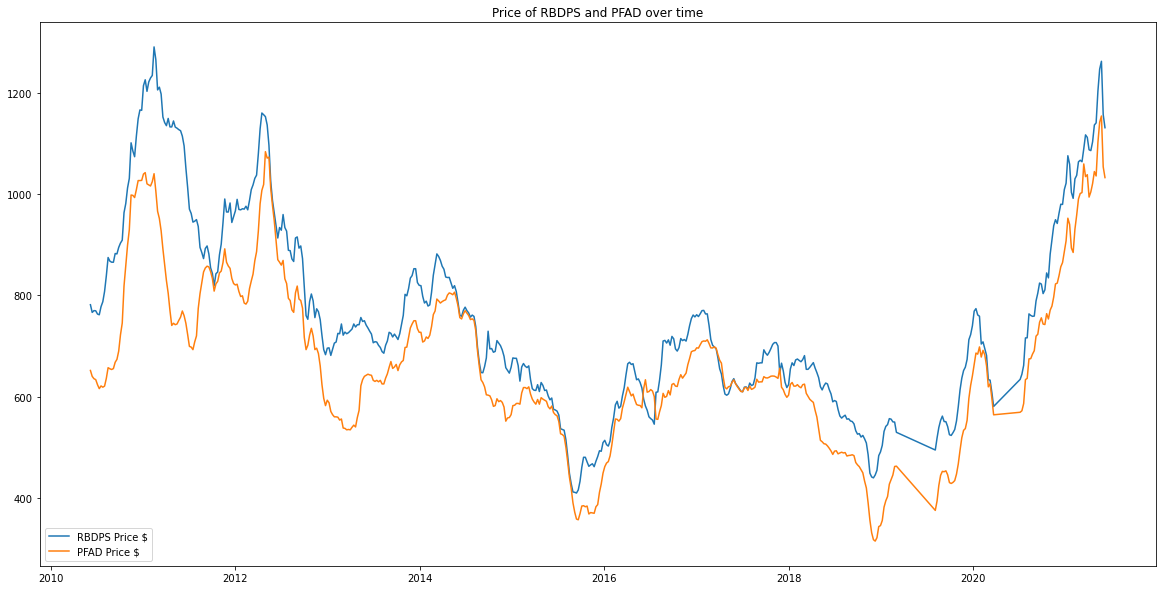

In [28]:
rm1_week = df1["RBDPS"].resample('1W').mean().dropna() # raw material 1
rm2_week = df1["PFAD"].resample('1W').mean().dropna()  # raw material 2 
plt.figure(figsize = (20,10))
rm1_plot = plt.plot(rm1_week, label = "RBDPS Price $")  # We are using the me
rm2_plot = plt.plot(rm2_week, label = "PFAD Price $")
plt.title("Price of RBDPS and PFAD over time")
plt.legend(loc = "lower left")
plt.show()


 We can see from the above graph that the two appear strongly correlated, with similar trends and noise

We are checking to see if there is strong correlation between the prices of our materials by calculating the Pearson correlation coefficient.

In [29]:
print("Pearson correlation coefficient: {}".format(df1[["RBDPS", "PFAD"]].corr(method = 'pearson').iloc[0][1]))

Pearson correlation coefficient: 0.9216669053138468


 There is strong correlation between RBDPS and PFAD. Since it is clear they have a lienar relationship, We can perform linear regression in order to make predictions.

It is clear that RBDPS is our independent variable/ explanatory variable, and PFAD is our dependent variable / response variable, since PFAD is a byproduct of RBDPS.

Linear regression is a model which quantifies the relationship between two variables and allows us to make predictions on the value of the response variable based on the value of the explanatory variable and tells us what the average response is for observations with a specific value for the explanatory variable.



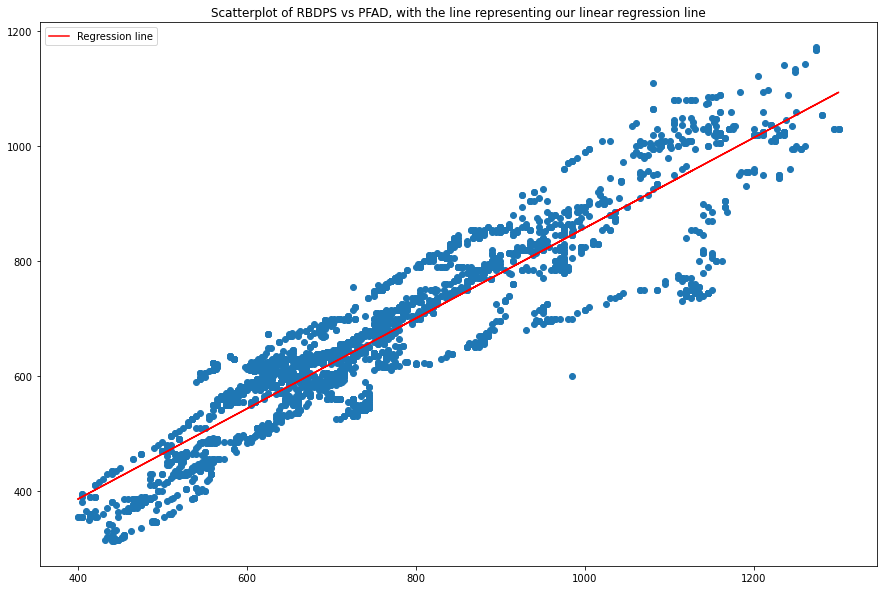

Linear Regression Equation: Y = 0.79X + 70.66
We use the above equation, and substituting a given value of RBDPS as X to get a value for PFAD


In [30]:
rm1 = df1["RBDPS"]
rm2 = df1["PFAD"]
X = np.vstack((rm1,)).T
y = np.array(rm2)
reg = LinearRegression()
reg.fit(X,y)

plt.figure(figsize = (15,10))
plt.scatter(X, y)
plt.plot(X, reg.predict(X), c = "red", label = "Regression line")
plt.title("Scatterplot of RBDPS vs PFAD, with the line representing our linear regression line")
plt.legend(loc = "upper left")
plt.show()

print ("Linear Regression Equation: Y = {:.2f}X + {:.2f}".format(reg.coef_[0], reg.intercept_))
print("We use the above equation, and substituting a given value of RBDPS as X to get a value for PFAD")

# We will now conduct Time series forecasting using the ARIMA model
***

## A brief description on ARIMA:

ARIMA stands for Autoregressive Integrated Moving Averages is a combination of models that explains/ forecasts a time series based on its own past values. It takes into account the lags and lagged forecast errors of the time series and generates an equation which can be used to predict future values.

There are 3 main parameters in the ARIMA model, namely p : order of the Auto Regressive or "AR" term, q : order of the Moving Averages or "MA" term, and  d: which is the number of times a series needs to be differenced to make it stationary.

The **parameter p** is used to define the number of lag observations in the model. A lag is a fixed amount of passing time, and lags are used to create an autocorellation function to see how a function compares to itself across different periods of time.

The **parameter q** is used to define the number of lagged forecast errors in the model. By calculating the lagged forecast errors, we are able to mitiage the impact of random, short term fluctuations in our timeseries.

The **parameter d** is used to create a stationary time series. A stationary time series is one whose properties are independent of the time at which the series is observed. Since our time series has a trend, we must use differencing in order to detrend the series.

We will use ARIMA model to conduct Time series forecasting on our data on RBDPS

______________________________________________________________________________


To check stationarity, we will conduct the Augmented Dickey-Fuller test

The ADF Test is conducted under the following assumptions:

Null Hypothesis: Series is non-stationary.

Alternate Hypothesis: Series is stationary.



In [31]:
from statsmodels.tsa.stattools import adfuller
result  = adfuller(rm1)
print ('Results of Dickey-Fuller Test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


Results of Dickey-Fuller Test:
ADF Statistic: -1.455576
p-value: 0.555362
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


Since our p - value is greater than 0.05 and our test statistic is greater than all critical values, we cannot reject the null hypothesis, and we conclude that our series is non-stationary. Which means we will require differencing in order to make it stationary.

We can try differencing once to check if our data will be stationary after.

In [32]:
first_diff = rm1 - rm1.shift(1)

first_diff = first_diff.dropna(inplace = False)

result  = adfuller(first_diff)
print ('Results of Dickey-Fuller Test:')
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))


Results of Dickey-Fuller Test:
ADF Statistic: -11.463880
p-value: 0.000000
Critical Values:
	1%: -3.432
	5%: -2.862
	10%: -2.567


We can see from the above output that our p value is less than 0.05 and our test statistic is significantly less than 1% critical value. Hence we have our d - parameter equal to 1.

We can use the auto_arima module to estimate the most suitable values parameters p and q by tuning parameters, and finding the parameters yielding the least AIC.

Akaike Information Criterion (AIC) is a statistical measure which evaluates the goodness of fit and the simplicity of the model.

AIC deals with a trade-off between goodness of fit and simplicity of the model, to limit overfitting as well as underfitting.

likelihood is a measure of how likely one is to see their observed data, given the model with certain parameters. 

AIC rewards likelihood, and penalises the number of parameters estimated, i.e. the value of AIC is less for a model with a higher likelihood, which shows the goodness of fit, and the value of AIC increases with a higher number of parameters estimated.
This essentially means, the least AIC value for a model with given parameters tells us that the model has the struck the best balance between overfitting and underfitting the model from all options provided in the form of parameters.

In [33]:
import pmdarima as pm

model = pm.auto_arima(rm1, start_p = 1, d = 1, start_q = 1, max_p = 8, max_q = 8, stepwise=True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27180.463, Time=0.34 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27347.240, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27179.459, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27184.299, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27345.533, Time=0.05 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27180.004, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27178.754, Time=2.13 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27158.588, Time=1.83 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27174.224, Time=0.46 sec
 ARIMA(4,1,1)(0,0,0)[0] intercept   : AIC=27159.424, Time=2.71 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=27159.882, Time=3.52 sec
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27165.404, Time=1.34 sec
 ARIMA(4,1,0)(0,0,0)[0] intercept   : AIC=27170.788, Time=0.53 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=27159.716, Time=3.87 sec
 ARIMA(3,1,1)(0,0,0

We found the best parameters to be (3,1,1), which means we found the best value for p to be 3 and q to be 1, since we had already established d = 1.

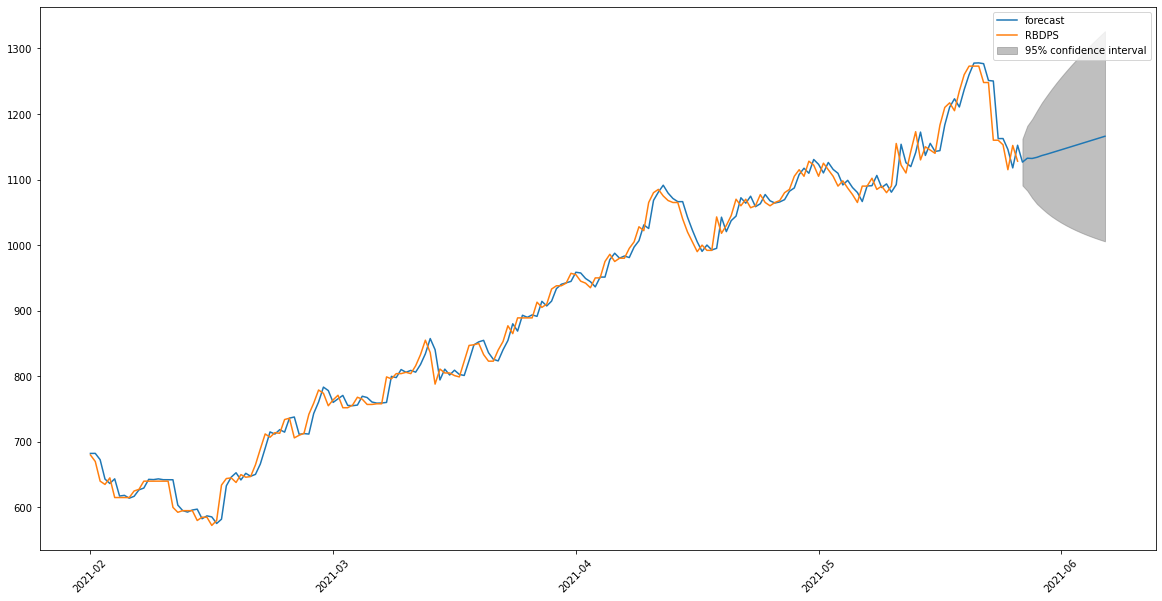

In [38]:
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

import datetime



arima_model = sm.tsa.ARIMA(rm1[3400:], order = (3,1,1))
results = arima_model.fit()

fig, ax = plt.subplots(figsize = (20,10))
results.plot_predict(1,210, ax = ax)
labels = ["2021-02", "2021-03", "2021-04","2021-05","2021-06"]
plt.xticks(ticks = [0,50,100,150,200],labels = labels, rotation = 45)
plt.show()
     

We have fitted the model to our data and obtained a 95 % confidence interval for the same, which is the interval where we predict the future prices to be in.

The interval is fairly wide which can be due to the the noise in the data and lack of seasonality as well as external parameters which affect the price of the raw material which are unaccounted for. The ARIMA model specifically learns from its own past observations and trends, but there are several other models which can be used to account for various other paramaters which include supply, demand, and availability of substitutes.

To sum up, we have analysed our data, created a linear regression model on the data which can now be used to predict values of PFAD based on the observations of RBDPS.<br>
We have also fitted the ARIMA model to the time series data of the RBDPS raw material. The ARIMA model can be used to make forecasts for the prices of the raw material in the future, which we estimate to be inside the 95% interval. Through the evaluation of our model and analysis of our data, we have a starting point to create more statistical models. Equipped with the knowledge we gained, we can build more models with a greater accuracy by learning the inconsistencies of the models we have created.

In [ ]:
.